# Explore here

It's recommended to use this notebook for exploration purposes.

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [5]:
url = "https://companies-market-cap-copy.vercel.app/index.html"
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"Error when access: {response.status_code}")
html_content = response.text

html_content

'\n<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<title>Tesla (TSLA) - Revenue</title>\n<meta charset="utf-8"/>\n<link rel="shortcut icon" href="https://companiesmarketcap.com/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/img/icons/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/img/icons/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/img/icons/apple-icon-72x72.png">\n<link rel="apple-touch-icon" sizes="76x76" href="/img/icons/apple-icon-76x76.png">\n<link rel="apple-touch-icon" sizes="114x114" href="/img/icons/apple-icon-114x114.png">\n<link rel="apple-touch-icon" sizes="120x120" href="/img/icons/apple-icon-120x120.png">\n<link rel="apple-touch-icon" sizes="144x144" href="/img/icons/apple-icon-144x144.png">\n<link rel="apple-touch-icon" sizes="152x152" href="/img/icons/apple-icon-152x152.png">\n<link rel="apple-touch-icon" sizes="180x180" href="/img/icons/apple-icon-180x180.png">\n<link rel="ic

In [6]:
soup = BeautifulSoup(html_content, "html.parser")

In [7]:
table = soup.find("table")  

table


<table class="table" style="width:100%">
<thead>
<tr>
<th>Year</th>
<th>Revenue</th>
<th>Change</th>
</tr>
</thead>
<tbody>
<tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr><tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr><tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr><tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr><tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr><tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr><tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr><tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr><tr><td><span class="year">2016</span

In [8]:

rows = table.find_all("tr")

data = []
for row in rows[1:]:  
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    data.append([date, revenue])

data



[['2024', '$97.15 B'],
 ['2023', '$96.77 B'],
 ['2022', '$81.46 B'],
 ['2021', '$53.82 B'],
 ['2020', '$31.53 B'],
 ['2019', '$24.57 B'],
 ['2018', '$21.46 B'],
 ['2017', '$11.75 B'],
 ['2016', '$7.00 B'],
 ['2015', '$4.04 B'],
 ['2014', '$3.19 B'],
 ['2013', '$2.01 B'],
 ['2012', '$0.41 B'],
 ['2011', '$0.20 B'],
 ['2010', '$0.11 B'],
 ['2009', '$0.11 B']]

In [9]:

df = pd.DataFrame(data, columns=["Date", "Revenue"])



In [10]:
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()

In [11]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS revenue (
    date TEXT,
    revenue REAL
)
""")

In [12]:
for index, row in df.iterrows():
    cursor.execute("INSERT INTO revenue (date, revenue) VALUES (?, ?)", (row["Date"], row["Revenue"]))

conn.commit()
conn.close()

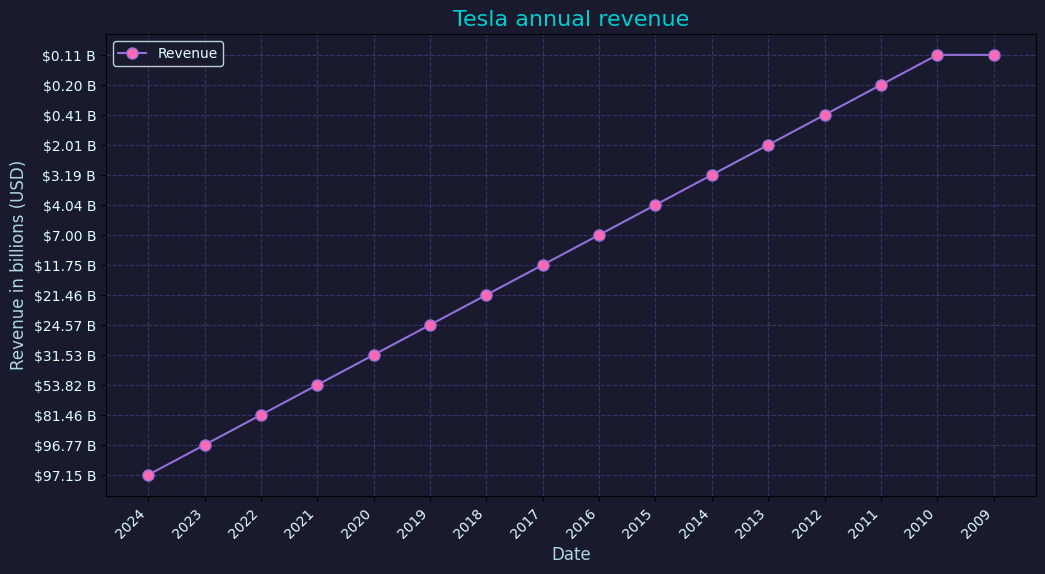

In [13]:
import matplotlib.pyplot as plt
colores = {      
    "background": "#1A1A2E",  # Dark background      
    "line": "#9370DB",        # Light purple line      
    "markers": "#FF69B4",     # Hot pink markers      
    "title": "#00CED1",        # Turquoise title      
    "labels": "#ADD8E6",       # Light blue labels      
    "grid": "#483D8B",         # Dark slate blue grid      
    "text": "#E0FFFF"          # Light cyan text  
}    

plt.figure(figsize=(12, 6), facecolor=colores["background"])  
ax = plt.gca()  
ax.set_facecolor(colores["background"])    

plt.plot(df["Date"], df["Revenue"], marker='o', color=colores["line"], markersize=8, markerfacecolor=colores["markers"], label="Revenue")  
plt.title("Tesla annual revenue", color=colores["title"], fontsize=16)  
plt.xlabel("Date", color=colores["labels"], fontsize=12)  
plt.ylabel("Revenue in billions (USD)", color=colores["labels"], fontsize=12)    

plt.xticks(rotation=45, ha='right', color=colores["text"])  
plt.yticks(color=colores["text"])    

plt.legend(facecolor=colores["background"], edgecolor=colores["text"], labelcolor=colores["text"])  
plt.grid(True, color=colores["grid"], linestyle='--', alpha=0.7)